In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
if not os.getcwd() == '/NN_project':
    os.chdir('..')

import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

pd.set_option("display.max_columns", 101)

In [2]:
pickle_file_test = 'data/preprocessed/VOC2012/preprocessed_test.pkl'
df_test = pd.read_pickle(pickle_file_test)

In [3]:
from src.models.YOLOv3 import create_model
model = create_model(0)

In [28]:
#model.load_weights('models/gcloud/2019_11_23_14_41_35.h5')
model.load_weights('models/gcloud/2019_11_23_10_20_11.h5')

## Performance on test data

Found 10 validated image filenames.
TP tf.Tensor([10.], shape=(1,), dtype=float32)
P tf.Tensor([21.], shape=(1,), dtype=float32)
FN tf.Tensor([11.], shape=(1,), dtype=float32)
PRECISION tf.Tensor(0.525, shape=(), dtype=float32)
RECALL tf.Tensor(0.5416667, shape=(), dtype=float32)


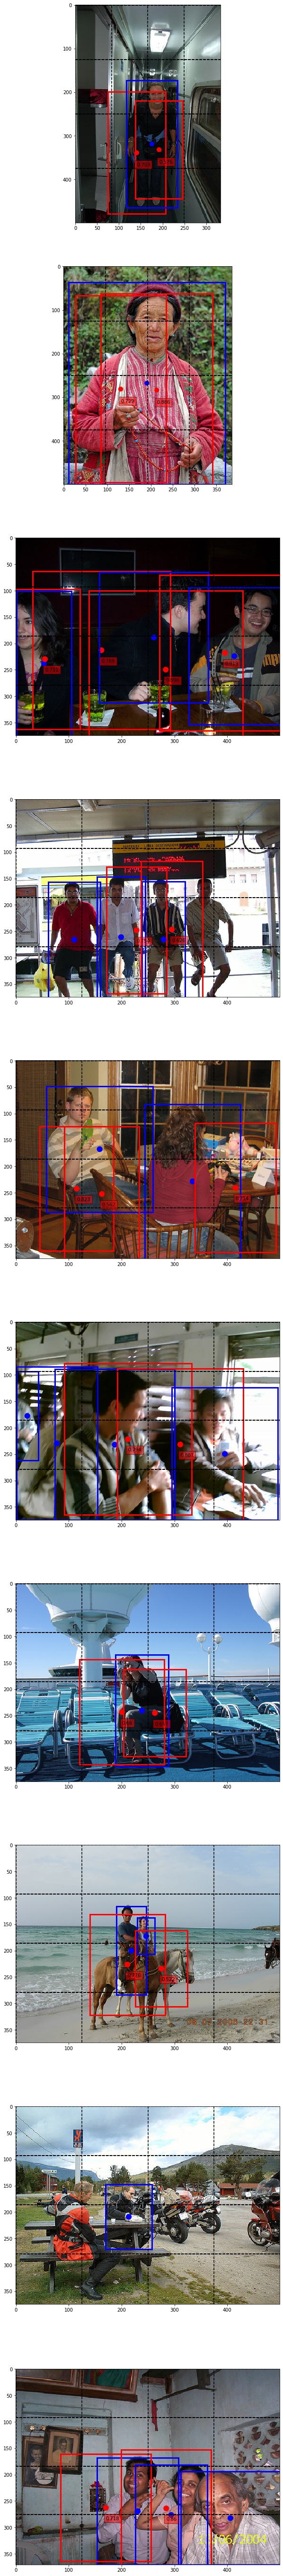

In [31]:
from src.data.VOC2012.plot import plot_grid
from src.models.DataGen import DataGenGrid
from src.models.metrics import precision, recall, true_positives, false_negative, positives
datagen = DataGenGrid()
num_predictions = 10
x_test = df_test.sample(num_predictions)
pred = model.predict_generator(datagen.flow_test(x_test))
print('TP', K.sum(true_positives(K.constant(np.stack(x_test['grid_output'].values)), K.constant(pred)), axis=0))
print('P', K.sum(positives(K.constant(np.stack(x_test['grid_output'].values)), K.constant(pred)), axis=0))
print('FN', K.sum(false_negative(K.constant(np.stack(x_test['grid_output'].values)), K.constant(pred)), axis=0))
print('PRECISION',K.mean(precision(K.constant(np.stack(x_test['grid_output'].values)), K.constant(pred))))
print('RECALL', K.mean(recall(K.constant(np.stack(x_test['grid_output'].values)), K.constant(pred))))
plt.subplots(min(num_predictions, 20), 1, figsize=(10, min(num_predictions, 20)*10))
for i in range(min(num_predictions, 20)):
    plt.subplot(min(num_predictions, 20), 1, i+1)
    plot_grid(x_test, x_test.index[i], np.array(pred[i][0]), plot_ground_truth=True, default_color='r')
plt.show()